<a href="https://colab.research.google.com/github/MIARD/Image_Processing_CSE428/blob/main/Image_Encryption_Modified_Arnold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import sys
import cv2
import copy
import random
import numpy as np
from skimage import exposure
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from PIL import Image as im, ImageOps
# plt.rcParams["figure.figsize"] = (20,3)

# Importing image

(-0.5, 1199.5, 1199.5, -0.5)

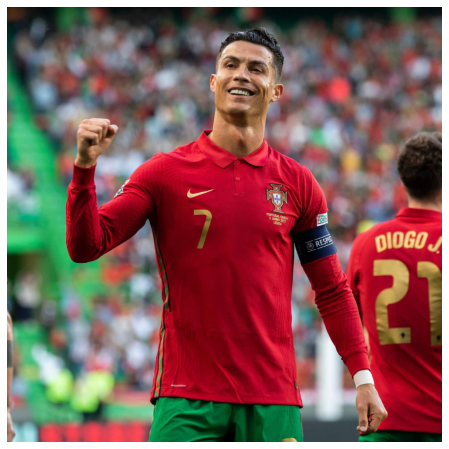

In [ ]:

image_name = 'cristiano.jpg'
path = "./image/"

# image = im.open(image_name.convert("L")
# rgbImage = cv2.imread(image_name)
# im.fromarray(rgb_reshaped).save('originial_reshape.jpg')
# gray_image = cv2.cvtColor(rgb_reshaped,cv2.COLOR_BGR2GRAY)

# imporot original image
rgbImage = im.open(image_name)
rgbImage_arr = np.array(rgbImage)
plt.figure(figsize=(8, 8))
plt.imshow(rgbImage)
plt.axis('off')


Text(0.5, 1.0, 'Blue part of image')

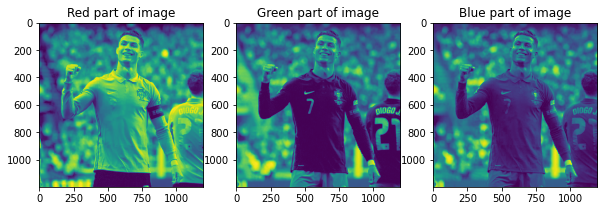

In [ ]:
red_image = rgbImage_arr[:,:,0]
green_image = rgbImage_arr[:,:,1]
blue_image = rgbImage_arr[:,:,2]


figure, axis = plt.subplots(1,3, figsize=(10,10))
axis[0].imshow(red_image)
axis[0].set_title('Red part of image')

axis[1].imshow(green_image)
axis[1].set_title('Green part of image')

axis[2].imshow(blue_image)
axis[2].set_title('Blue part of image')


In [ ]:
def image_reshape(image, size = False):
  # import throguh cv2
  # N = image.shape[0] if image.shape[0] < image.shape[1] else image.shape[1]
  # return cv2.resize(image, (N, N), interpolation = cv2.INTER_AREA)

  # import through PIL
  if type(size) != list:
   N = image.width if image.width<image.height else image.height
  return image.resize((N, N))

In [ ]:
# Reshape RGB image to NXN.
rgb_reshaped = rgbImage
if rgbImage.width != rgbImage.height:
  rgb_reshaped  = image_reshape(rgbImage)

print(f"Original Image shape is ({rgbImage.height}, {rgbImage.width})")
print(f"Reshaped Image shape is ({rgb_reshaped.height}, {rgb_reshaped.width})")

# Save original reshaped image
rgb_reshaped.save('originial_reshape.jpg')

Original Image shape is (1200, 1200)
Reshaped Image shape is (1200, 1200)


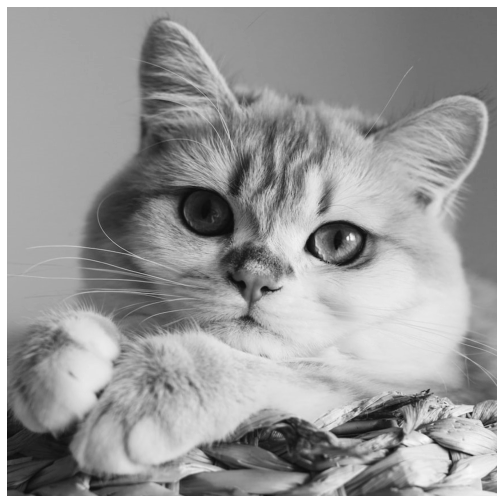

In [ ]:
# Convert rgb reshape image to gray
gray_image = ImageOps.grayscale(rgb_reshaped)

plt.figure(figsize=(9, 9))
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Save gray image
o_im_arr = np.asarray(gray_image)
im.fromarray(o_im_arr).save('original_reshape_gray.jpg')

#Arnold Class

In [ ]:
class Arnold:
  def __init__(self, f, n):
    self.f = f
    self.a0 = f[0][0]
    self.b0 = f[0][1]
    self.a1 = f[1][0]
    self.b1 = f[1][1]
    self.n = n

  def shufflePixel(self, shape):
    row, col = shape
    if row != col:
      print('The shape of the matrix has to be NxN!')
      return
    x, y = np.meshgrid(range(row), range(col), indexing="ij")
    # x' = (x + y)%n +1
    x_prime = (x + y) % row + 1
    # y' = (x + 2y)%n +1
    y_prime = (x + 2*y) % col + 1
    return x_prime - 1  , y_prime - 1


  def scrambleImage(self, image, saveItr = False, n=None):
    n= self.n if n is None else n
    x_prime, y_prime = self.shufflePixel(image.shape)
    img = image
    r, c = image.shape
    for i in range(1, n + 1):
        img = img[x_prime, y_prime]
        if saveItr and i!=n-1:
          data = im.fromarray(img)
          data.save('image_'+str(i)+".jpg")
    return img[:r, :c]

  def inverse_shufflePixel(self, shape):
      row, col = shape
      if row != col:
        print('The shape of the matrix has to be NxN!')
        return
      x_prime, y_prime = np.meshgrid(range(row), range(col), indexing="ij")
      # x = (2*x' - y')%n
      x = (2*(x_prime ) - y_prime ) % row
      # y = (y' - x')%n
      y = (y_prime-x_prime) % col
      return x , y

  def inverse_scrambleImage(self, image, oshape = None, saveItr = False, n=None):
    n= self.n if n is None else n
    x, y = self.inverse_shufflePixel(image.shape)
    img = image
    r, c = image.shape
    for i in range(n, 0, -1):
        img = img[x, y]
        if saveItr and i!=1:
          data = im.fromarray(img)
          data.save('image_in_'+str(i-1)+".jpg")
    return img[:r, :c]

#Mapping Image

In [ ]:
def mapImage(img, value = 255):
  inv_im_arr = np.empty_like(img)
  row, col = o_im_arr.shape
  for r in range(row):
    for c in range(col):
      inv_im_arr[r][c] = value - img[r][c]
  return inv_im_arr

inv_im_arr = mapImage(o_im_arr)

NameError: ignored

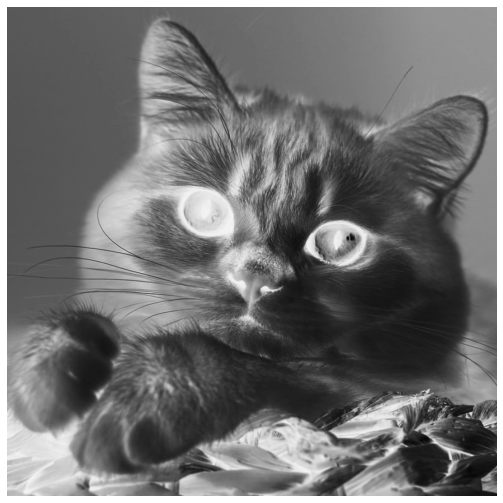

In [ ]:
plt.figure(figsize=(9, 9))
plt.imshow(inv_im_arr, cmap='gray')
plt.axis('off')
im.fromarray(inv_im_arr).save('Inverse_gray_image.jpg')

#Fourier Transform

(-0.5, 856.5, 856.5, -0.5)

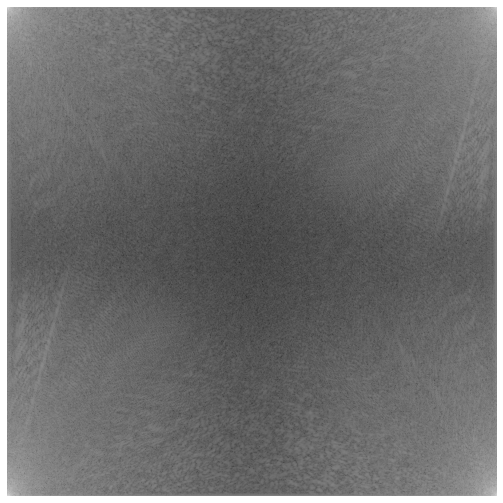

In [ ]:
image = imread('cute_cat.jpg')
f_im_arr = np.fft.fft2(inv_im_arr)
plt.figure(figsize=(9, 9))
plt.imshow(np.log(abs(f_im_arr)), cmap='gray')
plt.axis('off')

#Arnold Scrambling


Similarity percentage between original and scrambled image is: 0.00%


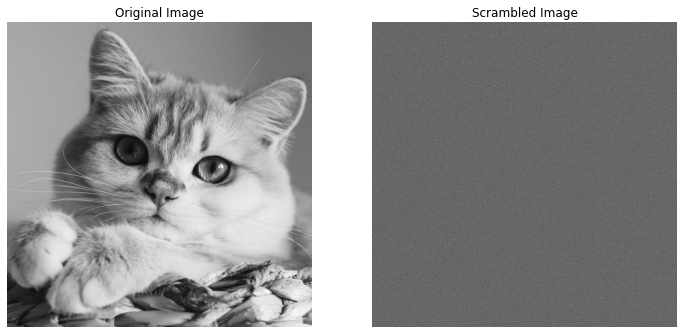

In [ ]:
im_arr = np.copy(f_im_arr)

# Initializing Arnold class object and required arguments
f = [[1, 1], [1, 2]]
n = 50
similarity_threshold = 10
arnold = Arnold(f, n,)
scrambled_arr = arnold.scrambleImage(im_arr, saveItr = False)

# Check whether the value of original and scrambled images are almost equal.
total_pixel_value = o_im_arr.shape[0]* o_im_arr.shape[1]
similiar_percentage = ((scrambled_arr==o_im_arr).sum()/ total_pixel_value)*100
print(f"Similarity percentage between original and scrambled image is: {similiar_percentage:.2f}%")

if similiar_percentage > similarity_threshold:
  print(f'The pixel value of scrambled image is {similiar_percentage:.2f}% same as original image')
  print('Try again with different n value!')


# scrambled_img = im.fromarray(scrambled_arr)
# scrambled_img.save("img_final_"+str(n)+".jpg")

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(abs(scrambled_arr)), cmap='gray')
plt.title('Scrambled Image')

plt.axis('off')
plt.show()

#Arnold discrambling

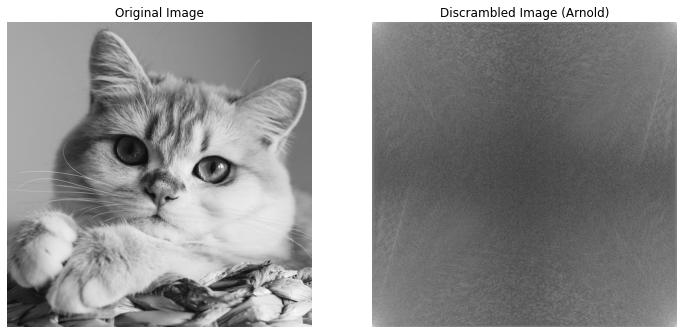

In [ ]:
discrambled_arr = arnold.inverse_scrambleImage(scrambled_arr, saveItr = False)


# discrambled_img = im.fromarray(discrambled_arr)
# discrambled_img.save("img_in_final_0.jpg")

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(abs(discrambled_arr)), cmap='gray')
plt.title('Discrambled Image (Arnold)')

plt.axis('off')
plt.show()

#Inverse Fourier Transform

(-0.5, 856.5, 856.5, -0.5)

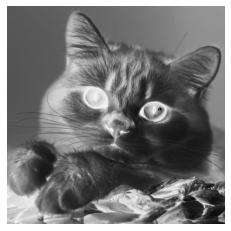

In [ ]:
f_discrambled_arr = abs(np.fft.ifft2(discrambled_arr))
# similiar_percentage = ((o_im_arr==f_discrambled_arr).sum()/ total_pixel_value)*100
# print(f"Similarity percentage between original and discrambled image is: {similiar_percentage:.2f}%")
plt.imshow(f_discrambled_arr, cmap='gray')
plt.axis('off')

#Inverse image pixels again

In [ ]:
final_discarmbled_img = mapImage(f_discrambled_arr)

(-0.5, 856.5, 856.5, -0.5)

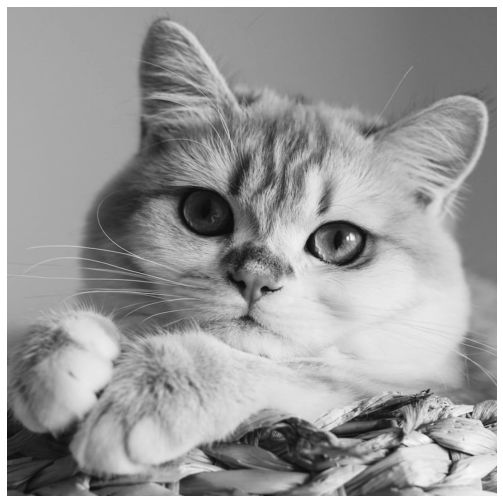

In [ ]:
plt.figure(figsize=(9, 9))
plt.imshow(final_discarmbled_img, cmap='gray')
plt.axis('off')
# im.fromarray(inv_im_arr).save('final_discrabled_inv_gray_image.jpg')